In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Exercise 1

In [156]:
data = pd.read_csv('bigcity.csv')

In [157]:
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0    49 non-null int64
u             49 non-null int64
x             49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [159]:
data.describe()

,Unnamed: 0,u,x
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


### a) Estimator of $\theta$

In [171]:
theta = data['x'].mean()/data['u'].mean()

theta

1.2390185991294025

### b) Estimation of Bias and Standard Error with Bootstrap

In [167]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [169]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(data['x'], np.mean)/bootstrap_replicate_1d(data['u'], np.mean)

In [172]:
bs_replicates.mean()

1.262831784519915

#### Bias

In [174]:
bias = bs_replicates.mean() - theta

bias

0.02381318539051258

#### Standard Error

In [175]:
standard_error = bs_replicates.std()

standard_error

0.2496104743151074

### c) Bootstrap Confidence Interval (90%)

In [178]:
conf_int = np.percentile(bs_replicates, [5.0, 95.0])

conf_int

array([0.90101609, 1.70978678])

## Exercise 2

### a) Pseudo-Random Values with Inverse Transform Method

In [4]:
def weibull_inverse_function(mu, alpha, n):
    u = stats.uniform.rvs(size = n, loc = 0, scale = 1)
    return mu * (-np.log(1 - u))**(1./alpha)

Pseudo-random values for $\mu = 3$ and $\alpha = 3.5$

In [214]:
weibull_inverse_function(3, 3.5, 1000)

array([2.49236806, 3.89612203, 2.83640559, 3.52033351, 3.90620886,
       3.13861278, 2.0590401 , 1.89909142, 3.48506567, 1.04290591,
       2.57083524, 3.81404505, 3.98468138, 3.56094135, 3.98442584,
       1.29072883, 3.01046298, 2.41040446, 2.01586065, 2.54747787,
       3.60928517, 4.20798977, 3.32029994, 4.51968446, 4.10919288,
       2.58246211, 1.40143635, 2.71018603, 1.09266395, 2.70398312,
       3.00610086, 2.67922025, 2.63217538, 1.18954698, 2.60009019,
       3.13946072, 2.77189595, 2.49320783, 2.73193132, 3.88288281,
       1.99344207, 1.93071924, 2.166088  , 2.13663712, 2.06935322,
       2.87706408, 2.10307182, 3.25991392, 1.92189539, 1.57789407,
       2.85751216, 1.11622574, 3.20204662, 3.40021836, 3.39152107,
       2.40975401, 1.19863508, 2.79491749, 3.22913746, 2.18354246,
       2.9759192 , 2.05567571, 2.31718885, 1.91625871, 2.61698469,
       3.08309628, 2.8992985 , 3.00266654, 3.16764488, 3.76305046,
       3.22864602, 2.30261417, 2.61126973, 2.70807302, 1.98171

### b) Plot of the Results

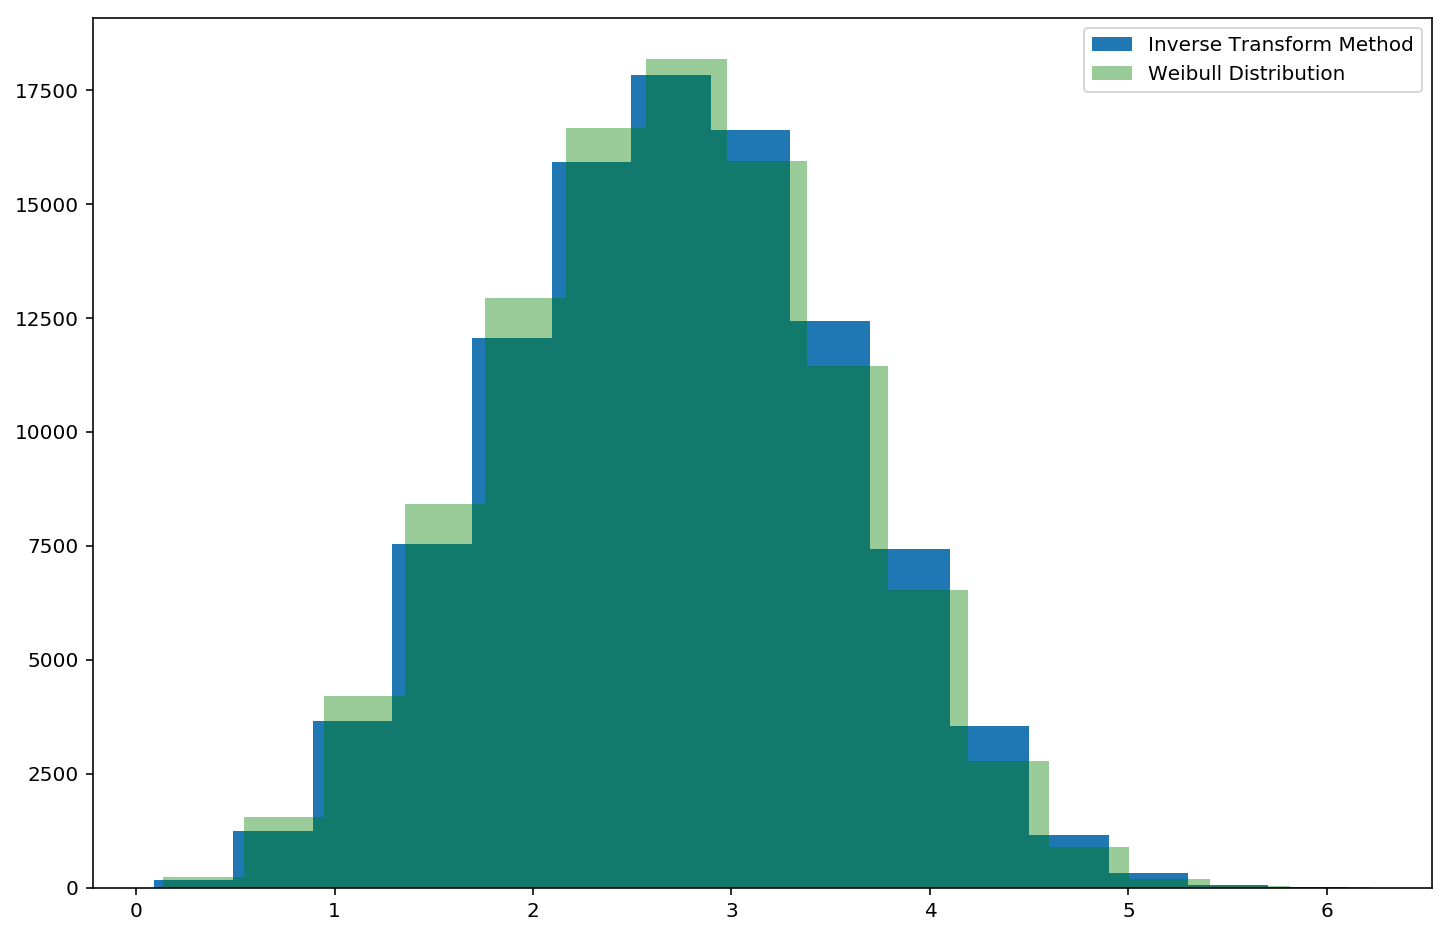

In [6]:
fig = plt.figure(figsize=(12,8))
plt.hist(weibull_inverse_function(3, 3.5, 100000), bins=15, label='Inverse Transform Method');
plt.hist(stats.weibull_min.rvs(c=3.5, loc=0, scale=3, size = 100000),alpha=0.4, color='g', bins=15, label='Weibull Distribution')
plt.legend();

## Exercise 3

In [4]:
import matplotlib.mlab as mlab

[-0.08795578  2.49945561  0.07010241  1.09940473  0.15572712]
[-0.0382505   2.72894262  0.08735652  0.84405566  0.22854103]
[-0.00750078  2.97414275  0.10628229  0.27033101  0.29434011]
[-0.00363504  2.99659426  0.11044738  0.10333672  0.3       ]
[-0.00363504  2.99659426  0.11044738  0.10333672  0.3       ]


C:\Users\dwalz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dwalz\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
C:\Users\dwalz\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


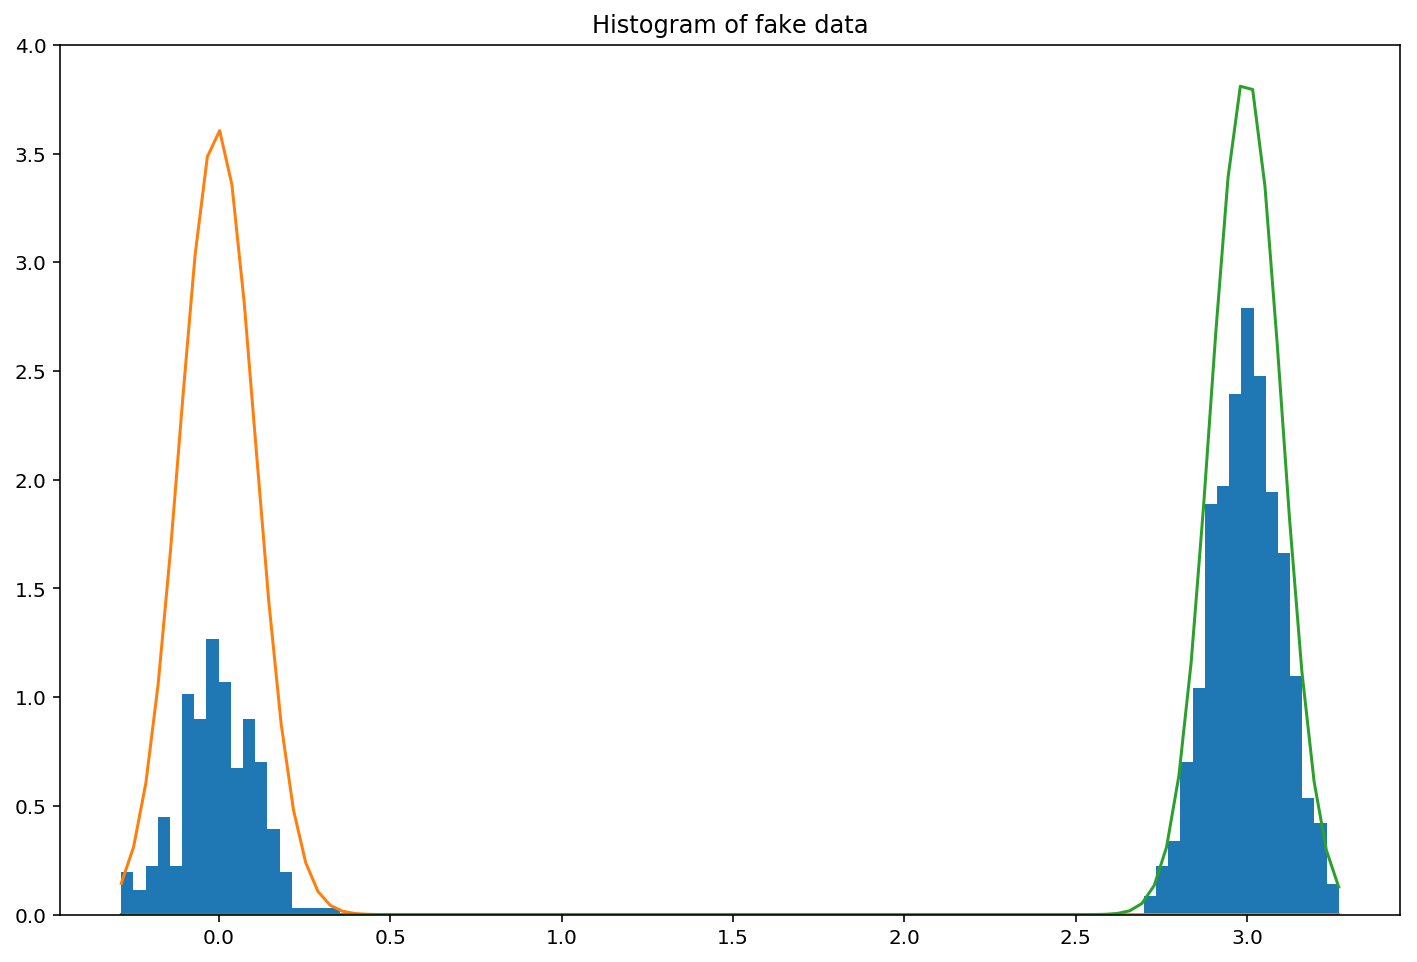

In [8]:
def gaussian(x, mean, dev=0.1):
    return 1/np.sqrt(2*np.pi)/dev*np.exp(-(x-mean)**2/2/dev**2)

#Generating Data
N = 1000
a = 0.3

sample1 = np.random.normal(0, 0.1, size=int(N*a))
sample2 = np.random.normal(3, 0.1, size=int(N*(1-a)))
sample = np.concatenate([sample1, sample2])

#Initial guess of parameters and initializations
params = np.array([-1, 1, 0.1, 0.1, 0.5])

plabel1 = np.zeros(sample.shape)
plabel2 = np.zeros(sample.shape)

#EM loop
counter = 0
criterion = 0.1
converged = False

while not converged and counter<100:
    counter += 1
    mu1, mu2, sd1, sd2, pi_1 = params
    
    #Expectation Step
    for i in range(len(sample)):
        cdf1 = gaussian(sample[i], mu1, sd1)
        cdf2 = gaussian(sample[i], mu2, sd2)
        
        pi_2 = 1 - pi_1
        
        plabel1[i] = cdf1 * pi_1/(cdf1 * pi_1 + cdf2 * pi_2)
        plabel2[i] = cdf2 * pi_2/(cdf1 * pi_1 + cdf2 * pi_2)
        
    #Maximization Step
    mu1 = sum(sample * plabel1)/sum(plabel1)
    mu2 = sum(sample * plabel2)/sum(plabel2)
    sd1 = np.sqrt(sum(plabel1 * (sample - mu1)**2)/sum(plabel1))
    sd2 = np.sqrt(sum(plabel2 * (sample - mu2)**2)/sum(plabel2))
    pi_1 = sum(plabel1)/len(sample)
    
    newparams = np.array([mu1, mu2, sd1, sd2, pi_1])
    
    #Convergence Check
    if np.max(abs(np.asarray(params) - np.asarray(newparams))) < criterion:
        converged = True
    params = newparams
    print(params)

fig = plt.figure(figsize=(12,8))
plt.title('Histogram of fake data')
plt.hist(sample,bins=100, normed=True)

x=np.linspace(sample.min(), sample.max(), 100)
plt.plot(x, mlab.normpdf(x,mu1, sd1))
plt.plot(x, mlab.normpdf(x,mu2, sd2))

plt.show()

## Exercise 4

### a) Function to compute $f(x, \delta)$

In [11]:
def f(x, delta):
    return (delta/(x*np.sqrt(2*np.pi)))*np.cosh(delta*np.log(2*x))*np.exp(-np.sinh(delta*np.log(2*x))**2/2)

In [14]:
x = np.arange(0.0001, 2.5, 0.0001)

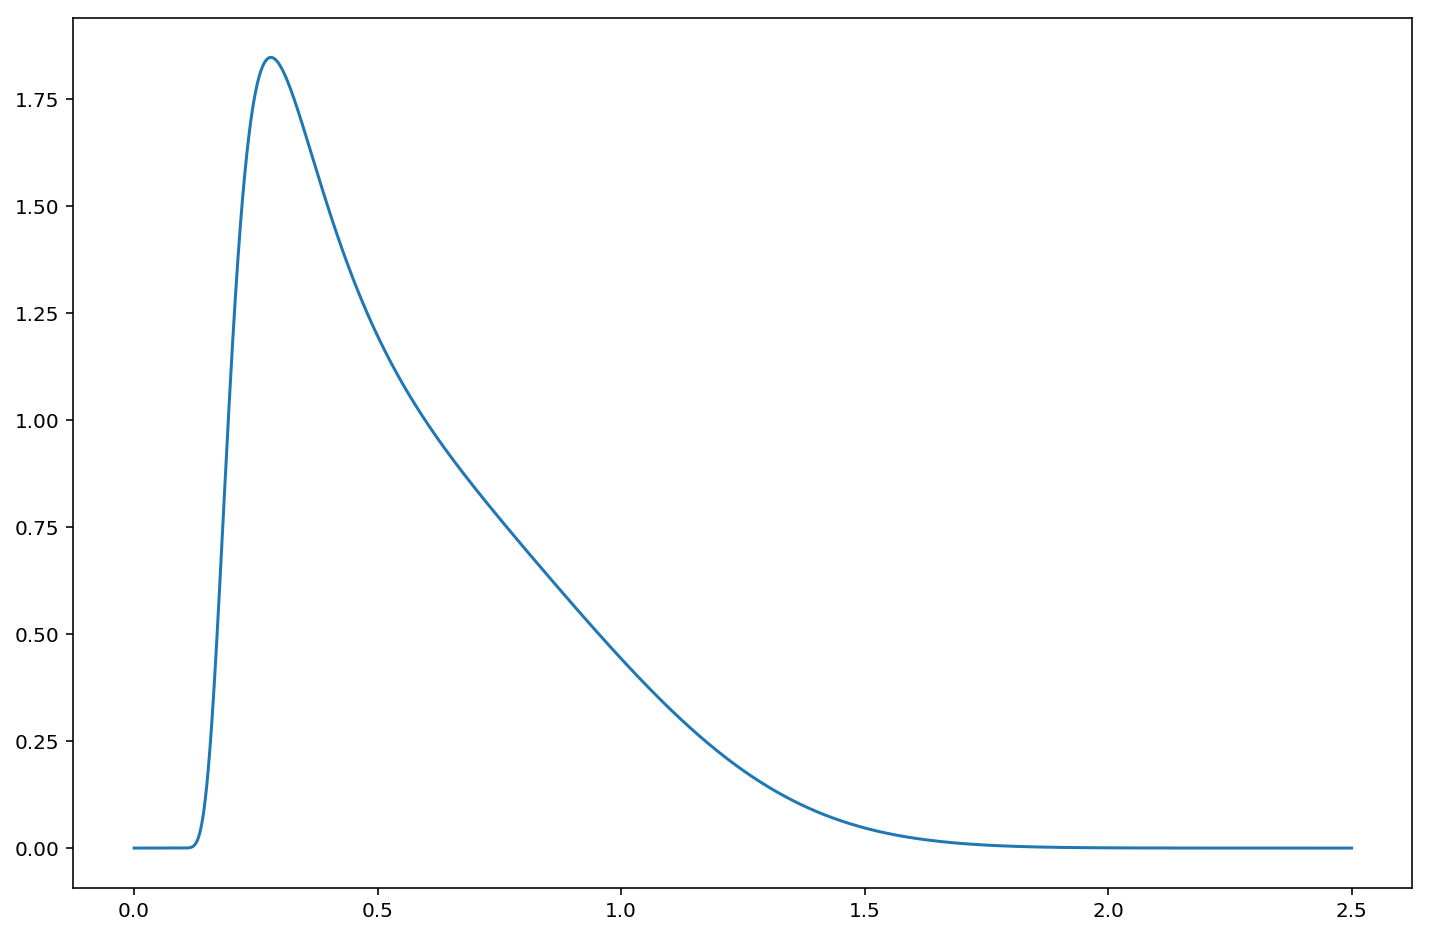

In [15]:
fig = plt.figure(figsize=(12,8))
plt.plot(x, f(x,1.5))

### b) Simulation with Acceptance-Rejection Sampling

In [17]:
def g(x):
    return stats.expon.pdf(x, scale=1)

alpha = max(f(x, 1.5)/g(x))

def e(x):
    return g(x)/alpha

def rejection_sampling(iter=1000):
    samples = []
    
    for i in range(iter):
        y = np.random.exponential(scale=1)
        u = np.random.uniform(0, 1)
        
        if u <= f(y, 1.5)/e(y):
            samples.append(y)
    
    return np.array(samples)

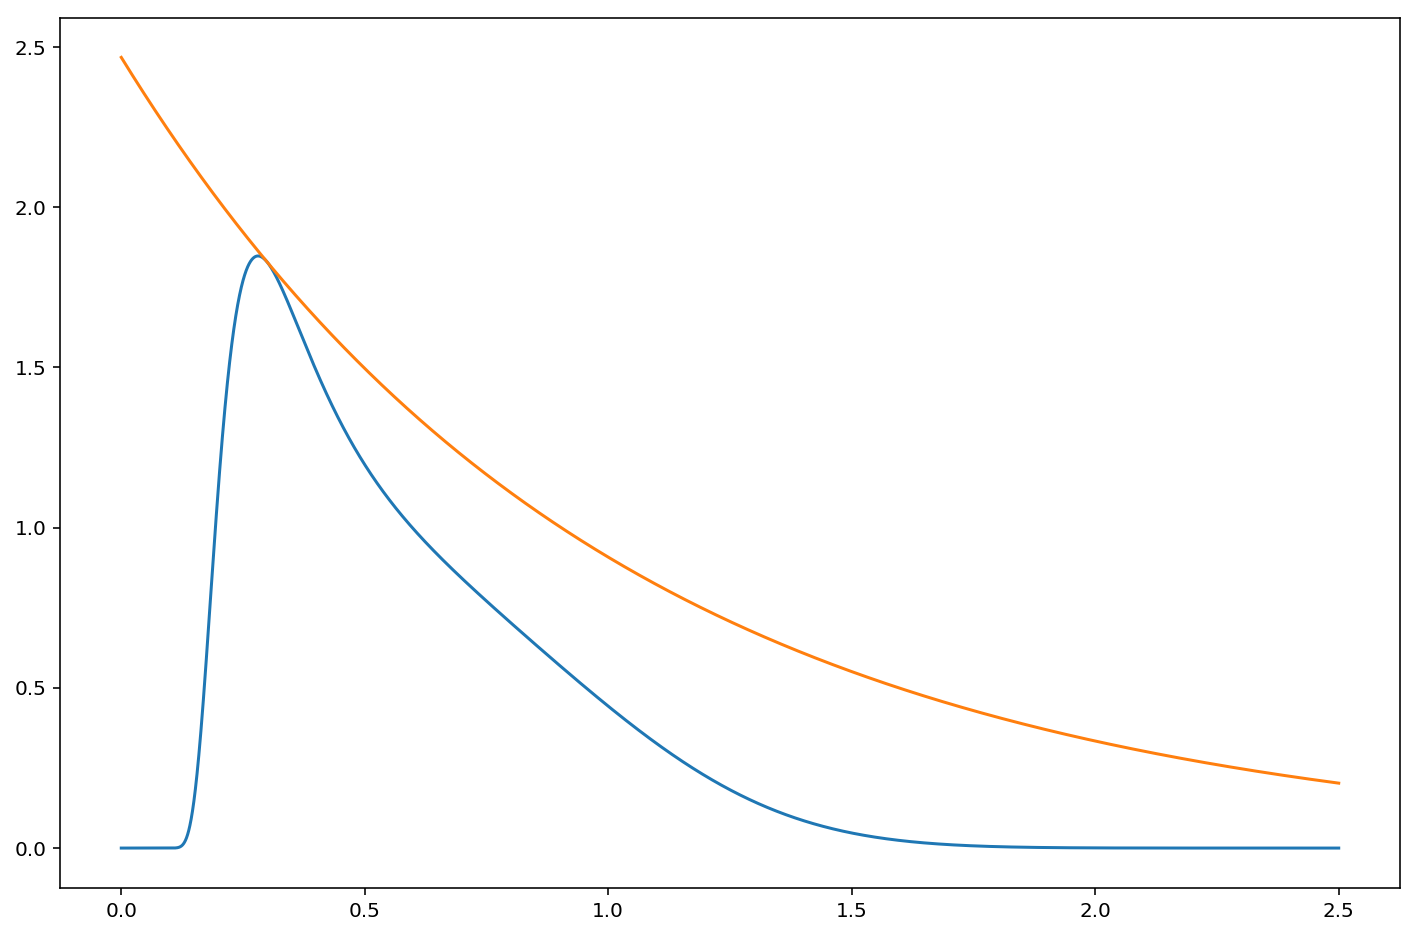

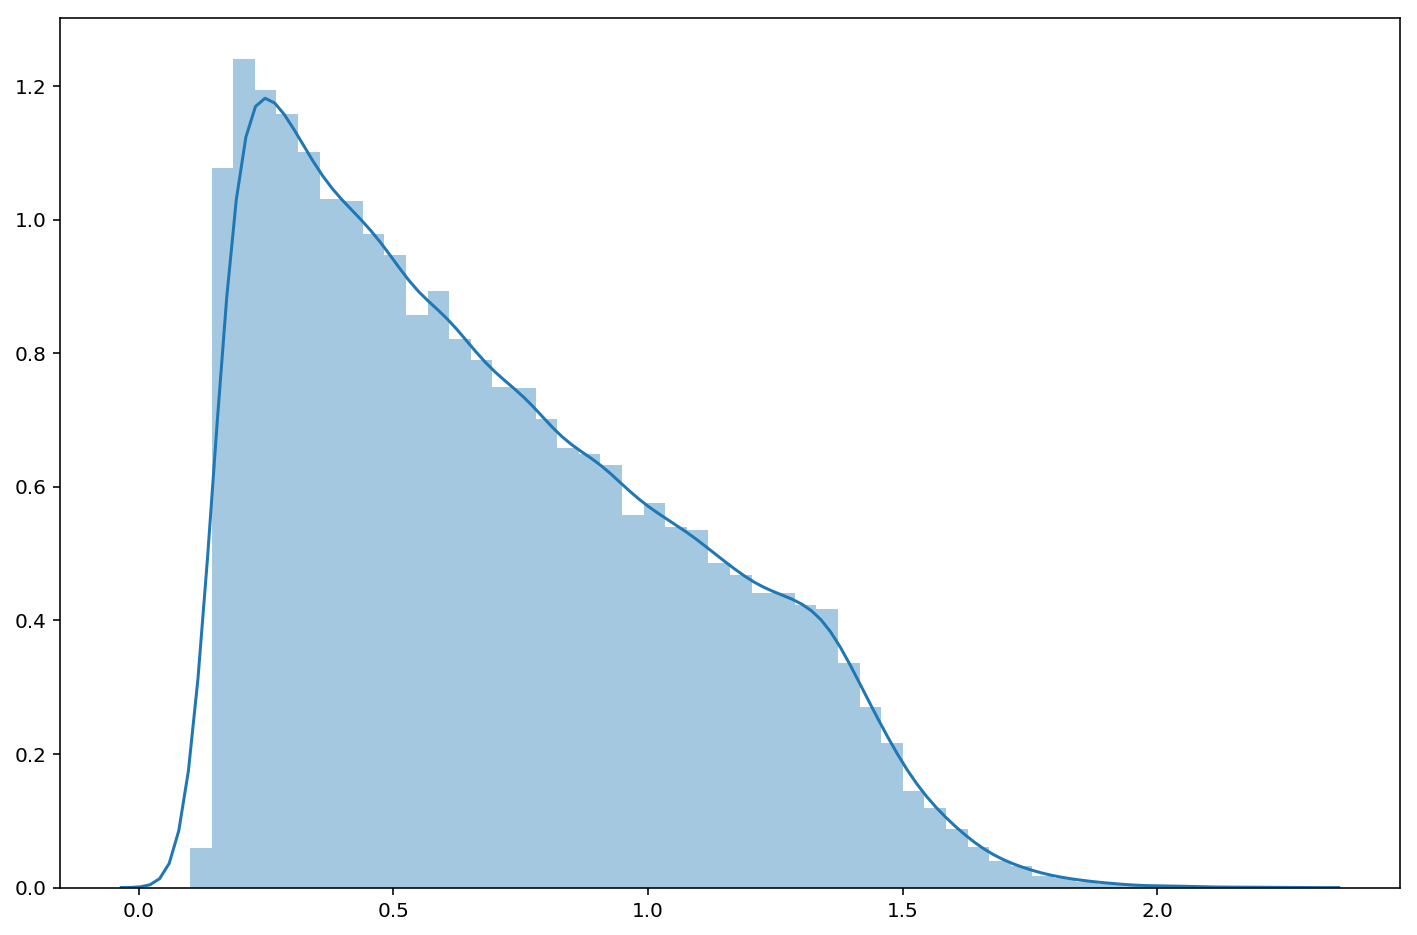

In [19]:
fig = plt.figure(figsize=(12,8))
plt.plot(x, f(x, 1.5))
plt.plot(x, alpha * g(x))

fig2 = plt.figure(figsize=(12,8))
s = rejection_sampling(iter=100000)
sns.distplot(s)

### c) Estimation of $E(X^2)$

In [247]:
def estimate(x):
    return (x**2).mean()

In [248]:
estimate(s)

0.6309072413706672

In [250]:
bs_replicates2 = np.empty(10000)
for i in range(10000):
    bs_replicates2[i] = bootstrap_replicate_1d(s**2, np.mean)
    
bs_replicates2.mean()

0.6309188685329873

#### Bias 

In [252]:
bias2 = bs_replicates2.mean() - estimate(s)

bias2

1.1627162320060336e-05

#### Standard Error

In [253]:
standard_error2 = bs_replicates2.std()

standard_error2

0.002522808547434657